In [144]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

%matplotlib inline

In [145]:
df = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/MobilityData.xlsx', sheet_name='Master', header=[0,1])
df.dropna(axis=1, how='all', inplace=True)

In [190]:
df_count = pd.read_excel('/Users/kazi0302/Desktop/SDSU/MSCSDS/COVID-19-Modeling-and-Parameter-Fitting/Data/MobilityData.xlsx', sheet_name='sod_od_hhsa')

In [191]:
df_count

,hhsa_orig,hhsa_dest,hhsa_name_orig,hhsa_name_dest,date_start,date_end,dev_count
0,1.0,1.0,NORTH COASTAL,NORTH COASTAL,2020-01-01,2020-01-02,39265.0
1,1.0,2.0,NORTH COASTAL,NORTH CENTRAL,2020-01-01,2020-01-02,1461.0
2,1.0,3.0,NORTH COASTAL,CENTRAL,2020-01-01,2020-01-02,961.0
3,1.0,4.0,NORTH COASTAL,SOUTH,2020-01-01,2020-01-02,244.0
4,1.0,5.0,NORTH COASTAL,EAST,2020-01-01,2020-01-02,242.0
...,...,...,...,...,...,...,...
11957,NaN,3.0,NaN,CENTRAL,2020-08-31,2020-09-01,3575.0
11958,NaN,4.0,NaN,SOUTH,2020-08-31,2020-09-01,2474.0
11959,NaN,5.0,NaN,EAST,2020-08-31,2020-09-01,1656.0
11960,NaN,6.0,NaN,NORTH INLAND,2020-08-31,2020-09-01,3768.0


In [192]:
df_count = df_count[:10253]
df_count.drop(['hhsa_orig', 'hhsa_dest'], axis=1, inplace=True)

In [193]:
df_count.head(10)

,hhsa_name_orig,hhsa_name_dest,date_start,date_end,dev_count
0,NORTH COASTAL,NORTH COASTAL,2020-01-01,2020-01-02,39265.0
1,NORTH COASTAL,NORTH CENTRAL,2020-01-01,2020-01-02,1461.0
2,NORTH COASTAL,CENTRAL,2020-01-01,2020-01-02,961.0
3,NORTH COASTAL,SOUTH,2020-01-01,2020-01-02,244.0
4,NORTH COASTAL,EAST,2020-01-01,2020-01-02,242.0
5,NORTH COASTAL,NORTH INLAND,2020-01-01,2020-01-02,2814.0
6,NORTH COASTAL,NaN,2020-01-01,2020-01-02,9672.0
7,NORTH COASTAL,NORTH COASTAL,2020-01-02,2020-01-03,42952.0
8,NORTH COASTAL,NORTH CENTRAL,2020-01-02,2020-01-03,2438.0
9,NORTH COASTAL,CENTRAL,2020-01-02,2020-01-03,899.0


In [198]:
df_count['hhsa'][0]

'NORTH COASTAL'

In [199]:
for i in range(len(df_count)):
    if df_count['hhsa_name_orig'][i] != df_count['hhsa_name_dest'][i]:
        df_count.drop(i, inplace=True)

# Reset index
df_count.reset_index(drop=True, inplace=True)

In [207]:
df_count_copy = df_count.copy()

for i in range(len(df_count_copy)):
    if df_count_copy['date_start'][i] < pd.Timestamp(2020, 4, 3, 0):
        df_count_copy.drop(i, inplace=True)

# Reset index
df_count_copy.reset_index(drop=True, inplace=True)

In [215]:
df_count_copy

,hhsa_name_orig,hhsa_name_dest,date_start,date_end,dev_count
0,NORTH COASTAL,NORTH COASTAL,2020-04-03,2020-04-04,34246.0
1,NORTH COASTAL,NORTH COASTAL,2020-04-04,2020-04-05,31951.0
2,NORTH COASTAL,NORTH COASTAL,2020-04-05,2020-04-06,29036.0
3,NORTH COASTAL,NORTH COASTAL,2020-04-06,2020-04-07,29326.0
4,NORTH COASTAL,NORTH COASTAL,2020-04-07,2020-04-08,29885.0
...,...,...,...,...,...
901,NORTH INLAND,NORTH INLAND,2020-08-27,2020-08-28,41381.0
902,NORTH INLAND,NORTH INLAND,2020-08-28,2020-08-29,41030.0
903,NORTH INLAND,NORTH INLAND,2020-08-29,2020-08-30,40640.0
904,NORTH INLAND,NORTH INLAND,2020-08-30,2020-08-31,40326.0


In [216]:
central_total = []
east_total = []
north_central_total = []
north_coastal_total = []
north_inland_total = []
south_total = []

for i in range(len(df_count_copy)):
    if df_count_copy['hhsa_name_orig'][i] == 'CENTRAL' == df_count_copy['hhsa_name_dest'][i]:
        central_total.append(df_count_copy['dev_count'][i])
    elif df_count_copy['hhsa_name_orig'][i] == 'EAST' == df_count_copy['hhsa_name_dest'][i]:
        east_total.append(df_count_copy['dev_count'][i])
    elif df_count_copy['hhsa_name_orig'][i] == 'NORTH CENTRAL' == df_count_copy['hhsa_name_dest'][i]:
        north_central_total.append(df_count_copy['dev_count'][i])
    elif df_count_copy['hhsa_name_orig'][i] == 'NORTH COASTAL' == df_count_copy['hhsa_name_dest'][i]:
        north_coastal_total.append(df_count_copy['dev_count'][i])
    elif df_count_copy['hhsa_name_orig'][i] == 'NORTH INLAND' == df_count_copy['hhsa_name_dest'][i]:
        north_inland_total.append(df_count_copy['dev_count'][i])
    elif df_count_copy['hhsa_name_orig'][i] == 'SOUTH' == df_count_copy['hhsa_name_dest'][i]:
        south_total.append(df_count_copy['dev_count'][i])

In [217]:
central_total

[20226.0,
 18870.0,
 17830.0,
 17800.0,
 17404.0,
 17679.0,
 17623.0,
 17419.0,
 17525.0,
 15981.0,
 16572.0,
 16410.0,
 16510.0,
 16352.0,
 16588.0,
 15960.0,
 15473.0,
 16957.0,
 17884.0,
 17912.0,
 17845.0,
 17758.0,
 16782.0,
 16256.0,
 16761.0,
 16862.0,
 16648.0,
 16417.0,
 19728.0,
 18385.0,
 16909.0,
 18359.0,
 18690.0,
 18797.0,
 18473.0,
 18597.0,
 18698.0,
 18154.0,
 18455.0,
 18443.0,
 18086.0,
 17583.0,
 18396.0,
 17588.0,
 18332.0,
 18985.0,
 19013.0,
 19209.0,
 19233.0,
 19873.0,
 18909.0,
 18042.0,
 18911.0,
 19162.0,
 18742.0,
 19503.0,
 20132.0,
 19923.0,
 19288.0,
 20061.0,
 19704.0,
 19939.0,
 19639.0,
 20569.0,
 19990.0,
 19624.0,
 20621.0,
 20097.0,
 20168.0,
 19838.0,
 21096.0,
 20671.0,
 19163.0,
 18632.0,
 18636.0,
 19216.0,
 18267.0,
 18225.0,
 18124.0,
 17535.0,
 19343.0,
 19161.0,
 19140.0,
 19314.0,
 19985.0,
 19110.0,
 18498.0,
 18717.0,
 19111.0,
 19666.0,
 19619.0,
 19853.0,
 18088.0,
 18313.0,
 19142.0,
 19581.0,
 19394.0,
 19355.0,
 19777.0,
 18843.0,


In [205]:
df_count['date_start'][0] >= pd.Timestamp(2020, 4, 1, 0)

False

In [206]:
pd.Timestamp(2020, 4, 1, 0)

Timestamp('2020-04-01 00:00:00')

In [7]:
# Total population of each region
central_tot = 511660
east_tot = 488330
north_central_tot = 646380
north_coastal_tot = 535219
north_inland_tot = 602000
south_tot = 500076

In [8]:
# Split the data into 6 regions
central = pd.concat([df.iloc[:, 0], df.iloc[:, 3:8]], axis=1)
east = pd.concat([df.iloc[:, 0], df.iloc[:, 8:13]], axis=1)
n_central = pd.concat([df.iloc[:, 0], df.iloc[:, 13:18]], axis=1)
n_coastal = pd.concat([df.iloc[:, 0], df.iloc[:, 18:23]], axis=1)
n_inland = pd.concat([df.iloc[:, 0], df.iloc[:, 23:28]], axis=1)
south = pd.concat([df.iloc[:, 0], df.iloc[:, 28:33]], axis=1)

In [9]:
# Calculate the ratio of people moved from each region to each other region (% converted)
central['Ratio Moved (to East)'] = central['Central', 'East'].apply(lambda x: 100*(x/central_tot))
central['Ratio Moved (to North Central)'] = central['Central', 'North Central'].apply(lambda x: 100*(x/central_tot))
central['Ratio Moved (to North Coastal)'] = central['Central', 'North Coastal'].apply(lambda x: 100*(x/central_tot))
central['Ratio Moved (to North Inland)'] = central['Central', 'North Inland'].apply(lambda x: 100*(x/central_tot))
central['Ratio Moved (to South)'] = central['Central', 'South'].apply(lambda x: 100*(x/central_tot))

east['Ratio Moved (to Central)'] = east['East', 'Central'].apply(lambda x: 100*(x/east_tot))
east['Ratio Moved (to North Central)'] = east['East', 'North Central'].apply(lambda x: 100*(x/east_tot))
east['Ratio Moved (to North Coastal)'] = east['East', 'North Coastal'].apply(lambda x: 100*(x/east_tot))
east['Ratio Moved (to North Inland)'] = east['East', 'North Inland'].apply(lambda x: 100*(x/east_tot))
east['Ratio Moved (to South)'] = east['East', 'South'].apply(lambda x: 100*(x/east_tot))

n_central['Ratio Moved (to Central)'] = n_central['North Central', 'Central'].apply(lambda x: 100*(x/north_central_tot))
n_central['Ratio Moved (to East)'] = n_central['North Central', 'East'].apply(lambda x: 100*(x/north_central_tot))
n_central['Ratio Moved (to North Coastal)'] = n_central['North Central', 'North Coastal'].apply(lambda x: 100*(x/north_central_tot))
n_central['Ratio Moved (to North Inland)'] = n_central['North Central', 'North Inland'].apply(lambda x: 100*(x/north_central_tot))
n_central['Ratio Moved (to South)'] = n_central['North Central', 'South'].apply(lambda x: 100*(x/north_central_tot))

n_coastal['Ratio Moved (to Central)'] = n_coastal['North Coastal', 'Central'].apply(lambda x: 100*(x/north_coastal_tot))
n_coastal['Ratio Moved (to East)'] = n_coastal['North Coastal', 'East'].apply(lambda x: 100*(x/north_coastal_tot))
n_coastal['Ratio Moved (to North Central)'] = n_coastal['North Coastal', 'North Central'].apply(lambda x: 100*(x/north_coastal_tot))
n_coastal['Ratio Moved (to North Inland)'] = n_coastal['North Coastal', 'North Inland'].apply(lambda x: 100*(x/north_coastal_tot))
n_coastal['Ratio Moved (to South)'] = n_coastal['North Coastal', 'South'].apply(lambda x: 100*(x/north_coastal_tot))

n_inland['Ratio Moved (to Central)'] = n_inland['North Inland', 'Central'].apply(lambda x: 100*(x/north_inland_tot))
n_inland['Ratio Moved (to East)'] = n_inland['North Inland', 'East'].apply(lambda x: 100*(x/north_inland_tot))
n_inland['Ratio Moved (to North Central)'] = n_inland['North Inland', 'North Central'].apply(lambda x: 100*(x/north_inland_tot))
n_inland['Ratio Moved (to North Coastal)'] = n_inland['North Inland', 'North Coastal'].apply(lambda x: 100*(x/north_inland_tot))
n_inland['Ratio Moved (to South)'] = n_inland['North Inland', 'South'].apply(lambda x: 100*(x/north_inland_tot))

south['Ratio Moved (to Central)'] = south['South', 'Central'].apply(lambda x: 100*(x/south_tot))
south['Ratio Moved (to East)'] = south['South', 'East'].apply(lambda x: 100*(x/south_tot))
south['Ratio Moved (to North Central)'] = south['South', 'North Central'].apply(lambda x: 100*(x/south_tot))
south['Ratio Moved (to North Coastal)'] = south['South', 'North Coastal'].apply(lambda x: 100*(x/south_tot))
south['Ratio Moved (to North Inland)'] = south['South', 'North Inland'].apply(lambda x: 100*(x/south_tot))

In [10]:
result = pd.concat([central.iloc[:, 6:], east.iloc[:, 6:], n_central.iloc[:, 6:], n_coastal.iloc[:, 6:], n_inland.iloc[:, 6:], south.iloc[:, 6:]], axis=1)

In [11]:
print('Max: ', max(result.max()))
print('Min: ', min(result.min()))
print('Avg: ', sum(result.sum()) / (result.shape[0] * result.shape[1]))

Max:  1.426903937910839
Min:  0.01439781153264704
Avg:  0.3120317933159559


In [113]:
df['Central']

,East,North Central,North Coastal,North Inland,South
0,2145,3857,318,633,2887
1,2381,5391,425,748,3685
2,2754,5939,507,792,4128
3,2683,4790,388,641,3796
4,2358,4143,311,585,3534
...,...,...,...,...,...
239,1909,3750,357,502,2696
240,2083,3735,431,509,2719
241,1994,3380,378,447,2853
242,1908,3072,283,348,2582


In [122]:
np.sum(df['Central'])

East             478537
North Central    917432
North Coastal     81755
North Inland     123643
South            673657
dtype: int64

In [117]:
np.sum(np.sum(df['East']))

2372094

In [118]:
np.sum(np.sum(df['North Central']))

1967967

In [119]:
np.sum(np.sum(df['North Coastal']))

1297407

In [120]:
np.sum(np.sum(df['North Inland']))

2533008

In [121]:
np.sum(np.sum(df['South']))

1930536

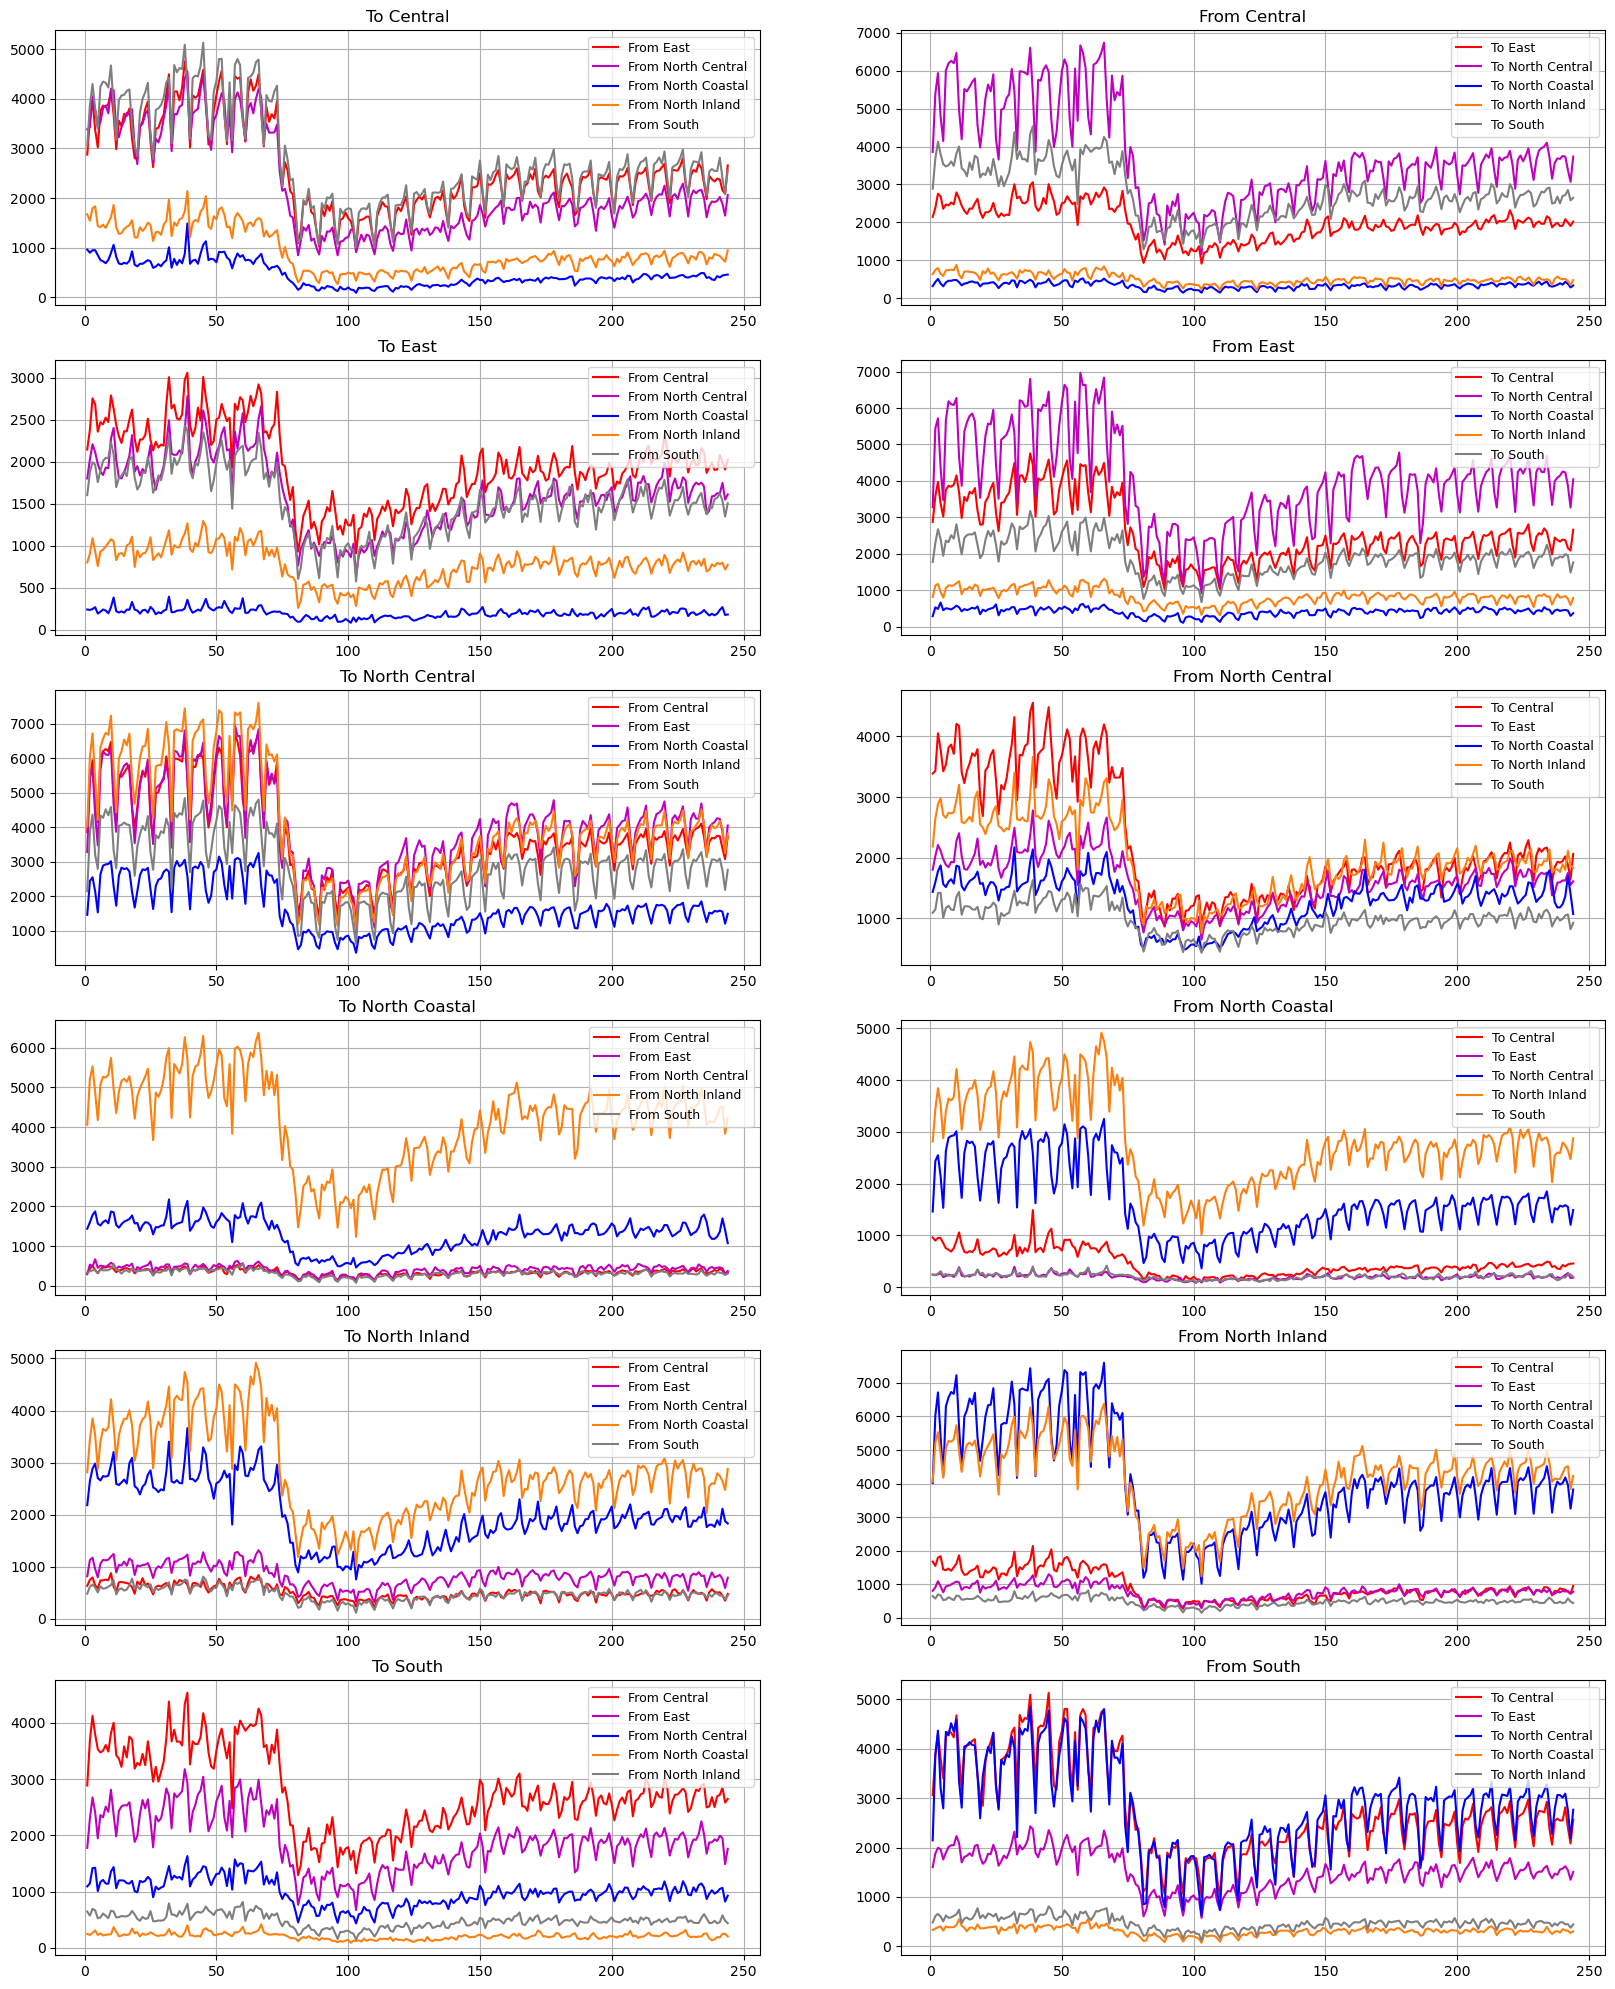

In [12]:
# Plot the movement of people from each region to the each region
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12)) = plt.subplots(6, 2, figsize=(20, 25))

ax1.set_title('To Central')
ax1.plot(df['Date', 'Date'], df['East', 'Central'], label = 'From East', color = 'r')
ax1.plot(df['Date', 'Date'], df['North Central', 'Central'], label = 'From North Central', color = 'm')
ax1.plot(df['Date', 'Date'], df['North Coastal', 'Central'], label = 'From North Coastal', color = 'b')
ax1.plot(df['Date', 'Date'], df['North Inland', 'Central'], label = 'From North Inland', color = 'tab:orange')
ax1.plot(df['Date', 'Date'], df['South', 'Central'], label = 'From South', color = 'tab:gray')
ax1.legend(loc='upper right', fontsize='9')
ax1.grid()

ax2.set_title('From Central')
ax2.plot(df['Date', 'Date'], df['Central', 'East'], label = 'To East', color = 'r')
ax2.plot(df['Date', 'Date'], df['Central', 'North Central'], label = 'To North Central', color = 'm')
ax2.plot(df['Date', 'Date'], df['Central', 'North Coastal'], label = 'To North Coastal', color = 'b')
ax2.plot(df['Date', 'Date'], df['Central', 'North Inland'], label = 'To North Inland', color = 'tab:orange')
ax2.plot(df['Date', 'Date'], df['Central', 'South'], label = 'To South', color = 'tab:gray')
ax2.legend(loc='upper right', fontsize='9')
ax2.grid()

ax3.set_title('To East')
ax3.plot(df['Date', 'Date'], df['Central', 'East'], label = 'From Central', color = 'r')
ax3.plot(df['Date', 'Date'], df['North Central', 'East'], label = 'From North Central', color = 'm')
ax3.plot(df['Date', 'Date'], df['North Coastal', 'East'], label = 'From North Coastal', color = 'b')
ax3.plot(df['Date', 'Date'], df['North Inland', 'East'], label = 'From North Inland', color = 'tab:orange')
ax3.plot(df['Date', 'Date'], df['South', 'East'], label = 'From South', color = 'tab:gray')
ax3.legend(loc='upper right', fontsize='9')
ax3.grid()

ax4.set_title('From East')
ax4.plot(df['Date', 'Date'], df['East', 'Central'], label = 'To Central', color = 'r')
ax4.plot(df['Date', 'Date'], df['East', 'North Central'], label = 'To North Central', color = 'm')
ax4.plot(df['Date', 'Date'], df['East', 'North Coastal'], label = 'To North Coastal', color = 'b')
ax4.plot(df['Date', 'Date'], df['East', 'North Inland'], label = 'To North Inland', color = 'tab:orange')
ax4.plot(df['Date', 'Date'], df['East', 'South'], label = 'To South', color = 'tab:gray')
ax4.legend(loc='upper right', fontsize='9')
ax4.grid()

ax5.set_title('To North Central')
ax5.plot(df['Date', 'Date'], df['Central', 'North Central'], label = 'From Central', color = 'r')
ax5.plot(df['Date', 'Date'], df['East', 'North Central'], label = 'From East', color = 'm')
ax5.plot(df['Date', 'Date'], df['North Coastal', 'North Central'], label = 'From North Coastal', color = 'b')
ax5.plot(df['Date', 'Date'], df['North Inland', 'North Central'], label = 'From North Inland', color = 'tab:orange')
ax5.plot(df['Date', 'Date'], df['South', 'North Central'], label = 'From South', color = 'tab:gray')
ax5.legend(loc='upper right', fontsize='9')
ax5.grid()

ax6.set_title('From North Central')
ax6.plot(df['Date', 'Date'], df['North Central', 'Central'], label = 'To Central', color = 'r')
ax6.plot(df['Date', 'Date'], df['North Central', 'East'], label = 'To East', color = 'm')
ax6.plot(df['Date', 'Date'], df['North Central', 'North Coastal'], label = 'To North Coastal', color = 'b')
ax6.plot(df['Date', 'Date'], df['North Central', 'North Inland'], label = 'To North Inland', color = 'tab:orange')
ax6.plot(df['Date', 'Date'], df['North Central', 'South'], label = 'To South', color = 'tab:gray')
ax6.legend(loc='upper right', fontsize='9')
ax6.grid()

ax7.set_title('To North Coastal')
ax7.plot(df['Date', 'Date'], df['Central', 'North Coastal'], label = 'From Central', color = 'r')
ax7.plot(df['Date', 'Date'], df['East', 'North Coastal'], label = 'From East', color = 'm')
ax7.plot(df['Date', 'Date'], df['North Central', 'North Coastal'], label = 'From North Central', color = 'b')
ax7.plot(df['Date', 'Date'], df['North Inland', 'North Coastal'], label = 'From North Inland', color = 'tab:orange')
ax7.plot(df['Date', 'Date'], df['South', 'North Coastal'], label = 'From South', color = 'tab:gray')
ax7.legend(loc='upper right', fontsize='9')
ax7.grid()

ax8.set_title('From North Coastal')
ax8.plot(df['Date', 'Date'], df['North Coastal', 'Central'], label = 'To Central', color = 'r')
ax8.plot(df['Date', 'Date'], df['North Coastal', 'East'], label = 'To East', color = 'm')
ax8.plot(df['Date', 'Date'], df['North Coastal', 'North Central'], label = 'To North Central', color = 'b')
ax8.plot(df['Date', 'Date'], df['North Coastal', 'North Inland'], label = 'To North Inland', color = 'tab:orange')
ax8.plot(df['Date', 'Date'], df['North Coastal', 'South'], label = 'To South', color = 'tab:gray')
ax8.legend(loc='upper right', fontsize='9')
ax8.grid()

ax9.set_title('To North Inland')
ax9.plot(df['Date', 'Date'], df['Central', 'North Inland'], label = 'From Central', color = 'r')
ax9.plot(df['Date', 'Date'], df['East', 'North Inland'], label = 'From East', color = 'm')
ax9.plot(df['Date', 'Date'], df['North Central', 'North Inland'], label = 'From North Central', color = 'b')
ax9.plot(df['Date', 'Date'], df['North Coastal', 'North Inland'], label = 'From North Coastal', color = 'tab:orange')
ax9.plot(df['Date', 'Date'], df['South', 'North Inland'], label = 'From South', color = 'tab:gray')
ax9.legend(loc='upper right', fontsize='9')
ax9.grid()

ax10.set_title('From North Inland')
ax10.plot(df['Date', 'Date'], df['North Inland', 'Central'], label = 'To Central', color = 'r')
ax10.plot(df['Date', 'Date'], df['North Inland', 'East'], label = 'To East', color = 'm')
ax10.plot(df['Date', 'Date'], df['North Inland', 'North Central'], label = 'To North Central', color = 'b')
ax10.plot(df['Date', 'Date'], df['North Inland', 'North Coastal'], label = 'To North Coastal', color = 'tab:orange')
ax10.plot(df['Date', 'Date'], df['North Inland', 'South'], label = 'To South', color = 'tab:gray')
ax10.legend(loc='upper right', fontsize='9')
ax10.grid()

ax11.set_title('To South')
ax11.plot(df['Date', 'Date'], df['Central', 'South'], label = 'From Central', color = 'r')
ax11.plot(df['Date', 'Date'], df['East', 'South'], label = 'From East', color = 'm')
ax11.plot(df['Date', 'Date'], df['North Central', 'South'], label = 'From North Central', color = 'b')
ax11.plot(df['Date', 'Date'], df['North Coastal', 'South'], label = 'From North Coastal', color = 'tab:orange')
ax11.plot(df['Date', 'Date'], df['North Inland', 'South'], label = 'From North Inland', color = 'tab:gray')
ax11.legend(loc='upper right', fontsize='9')
ax11.grid()

ax12.set_title('From South')
ax12.plot(df['Date', 'Date'], df['South', 'Central'], label = 'To Central', color = 'r')
ax12.plot(df['Date', 'Date'], df['South', 'East'], label = 'To East', color = 'm')
ax12.plot(df['Date', 'Date'], df['South', 'North Central'], label = 'To North Central', color = 'b')
ax12.plot(df['Date', 'Date'], df['South', 'North Coastal'], label = 'To North Coastal', color = 'tab:orange')
ax12.plot(df['Date', 'Date'], df['South', 'North Inland'], label = 'To North Inland', color = 'tab:gray')
ax12.legend(loc='upper right', fontsize='9')
ax12.grid()

### Mobility Estimation

In [13]:
# Initialize the dataframe to store the fitted parameters
fitted_param_from_to = pd.DataFrame(columns = ['From', 'To', 'Level 1', 'Level 2', 'Level 3', 'Recovery rate'])
fitted_param_to_from = pd.DataFrame(columns = ['To', 'From', 'Level 1', 'Level 2', 'Level 3', 'Recovery rate'])

In [14]:
def piecewise(t_array, L1, L2, L3, r):

    '''
    Define a piecewise function to fit the data
    -------------------------------------------
    Input:
        t_array: the time array
        L1: the level 1 -> Estimation (pure guess)
        L2: the level 2 -> Estimation (pure guess)
        L3: the level 3 -> Estimation (pure guess)

    Output:
        temp: the fitted value
    '''

    # Copy the data to avoid changing the original data
    temp = np.copy(t_array)

    # Loop through the time array
    for i in range(0, len(t_array)):

        # If the time is less than 70 (estimation from the plot), we assume it's a horizontal linear function which has the value of L1
        if t_array[i] <= 70:
            temp[i] = L1

        # If the time is between 70 and 80, we assume it's a linear drop function which has the value of L1 at 70 and L2 at 80
        elif t_array[i] > 70 and t_array[i] < 80:
            temp[i] = L1 - (L1 - L2) * (t_array[i] - 70) / (80 - 70)

        # If the time is greater than 80, we assume it's an exponential grow function which has the value of L2 and L3 at 80 and the recovery rate is r
        else:
            temp[i] = L3 + (L2 - L3) * np.exp(-r*(t_array[i]-80))
            
    return temp

In [15]:
def fit_and_store(region_1, region_2):

    '''
    Fit the data and store the fitted parameters
    --------------------------------------------
    Input:
        region_1: the region where the data is from
        region_2: the region where the data is to
    
    Output:
        popt: the fitted parameters
    '''

    x = df['Date', 'Date'].astype('float64').to_numpy()
    y = df[region_1, region_2].astype('float64').to_numpy()
    popt, pcov = curve_fit(piecewise, x, y, p0 = [3500.0, 1500.0, 2500.0, 0.01])
    return popt

In [16]:
# Compute the fitted parameters (ratio of people movement)
popt_Central_to_East = fit_and_store('Central', 'East')
popt_Central_to_NCentral = fit_and_store('Central', 'North Central')
popt_Central_to_NCoastal = fit_and_store('Central', 'North Coastal')
popt_Central_to_NInland = fit_and_store('Central', 'North Inland')
popt_Central_to_South = fit_and_store('Central', 'South')

popt_East_to_Central = fit_and_store('East', 'Central')
popt_East_to_NCentral = fit_and_store('East', 'North Central')
popt_East_to_NCoastal = fit_and_store('East', 'North Coastal')
popt_East_to_NInland = fit_and_store('East', 'North Inland')
popt_East_to_South = fit_and_store('East', 'South')

popt_NCentral_to_Central = fit_and_store('North Central', 'Central')
popt_NCentral_to_East = fit_and_store('North Central', 'East')
popt_NCentral_to_NCoastal = fit_and_store('North Central', 'North Coastal')
popt_NCentral_to_NInland = fit_and_store('North Central', 'North Inland')
popt_NCentral_to_South = fit_and_store('North Central', 'South')

popt_NCoastal_to_Central = fit_and_store('North Coastal', 'Central')
popt_NCoastal_to_East = fit_and_store('North Coastal', 'East')
popt_NCoastal_to_NCentral = fit_and_store('North Coastal', 'North Central')
popt_NCoastal_to_NInland = fit_and_store('North Coastal', 'North Inland')
popt_NCoastal_to_South = fit_and_store('North Coastal', 'South')

popt_NInland_to_Central = fit_and_store('North Inland', 'Central')
popt_NInland_to_East = fit_and_store('North Inland', 'East')
popt_NInland_to_NCentral = fit_and_store('North Inland', 'North Central')
popt_NInland_to_NCoastal = fit_and_store('North Inland', 'North Coastal')
popt_NInland_to_South = fit_and_store('North Inland', 'South')

popt_South_to_Central = fit_and_store('South', 'Central')
popt_South_to_East = fit_and_store('South', 'East')
popt_South_to_NCentral = fit_and_store('South', 'North Central')
popt_South_to_NCoastal = fit_and_store('South', 'North Coastal')
popt_South_to_NInland = fit_and_store('South', 'North Inland')

In [17]:
# Reconstruct the column names
fitted_param_from_to.loc[len(fitted_param_from_to)] = ['Central', 'East', popt_Central_to_East[0], popt_Central_to_East[1], popt_Central_to_East[2], popt_Central_to_East[3]]
fitted_param_from_to.loc[len(fitted_param_from_to)] = ['Central', 'North Central', popt_Central_to_NCentral[0], popt_Central_to_NCentral[1], popt_Central_to_NCentral[2], popt_Central_to_NCentral[3]]
fitted_param_from_to.loc[len(fitted_param_from_to)] = ['Central', 'North Coastal', popt_Central_to_NCoastal[0], popt_Central_to_NCoastal[1], popt_Central_to_NCoastal[2], popt_Central_to_NCoastal[3]]
fitted_param_from_to.loc[len(fitted_param_from_to)] = ['Central', 'North Inland', popt_Central_to_NInland[0], popt_Central_to_NInland[1], popt_Central_to_NInland[2], popt_Central_to_NInland[3]]
fitted_param_from_to.loc[len(fitted_param_from_to)] = ['Central', 'South', popt_Central_to_South[0], popt_Central_to_South[1], popt_Central_to_South[2], popt_Central_to_South[3]]

fitted_param_from_to.loc[len(fitted_param_from_to)] = ['East', 'Central', popt_East_to_Central[0], popt_East_to_Central[1], popt_East_to_Central[2], popt_East_to_Central[3]]
fitted_param_from_to.loc[len(fitted_param_from_to)] = ['East', 'North Central', popt_East_to_NCentral[0], popt_East_to_NCentral[1], popt_East_to_NCentral[2], popt_East_to_NCentral[3]]
fitted_param_from_to.loc[len(fitted_param_from_to)] = ['East', 'North Coastal', popt_East_to_NCoastal[0], popt_East_to_NCoastal[1], popt_East_to_NCoastal[2], popt_East_to_NCoastal[3]]
fitted_param_from_to.loc[len(fitted_param_from_to)] = ['East', 'North Inland', popt_East_to_NInland[0], popt_East_to_NInland[1], popt_East_to_NInland[2], popt_East_to_NInland[3]]
fitted_param_from_to.loc[len(fitted_param_from_to)] = ['East', 'South', popt_East_to_South[0], popt_East_to_South[1], popt_East_to_South[2], popt_East_to_South[3]]

fitted_param_from_to.loc[len(fitted_param_from_to)] = ['North Central', 'Central', popt_NCentral_to_Central[0], popt_NCentral_to_Central[1], popt_NCentral_to_Central[2], popt_NCentral_to_Central[3]]
fitted_param_from_to.loc[len(fitted_param_from_to)] = ['North Central', 'East', popt_NCentral_to_East[0], popt_NCentral_to_East[1], popt_NCentral_to_East[2], popt_NCentral_to_East[3]]
fitted_param_from_to.loc[len(fitted_param_from_to)] = ['North Central', 'North Coastal', popt_NCentral_to_NCoastal[0], popt_NCentral_to_NCoastal[1], popt_NCentral_to_NCoastal[2], popt_NCentral_to_NCoastal[3]]
fitted_param_from_to.loc[len(fitted_param_from_to)] = ['North Central', 'North Inland', popt_NCentral_to_NInland[0], popt_NCentral_to_NInland[1], popt_NCentral_to_NInland[2], popt_NCentral_to_NInland[3]]
fitted_param_from_to.loc[len(fitted_param_from_to)] = ['North Central', 'South', popt_NCentral_to_South[0], popt_NCentral_to_South[1], popt_NCentral_to_South[2], popt_NCentral_to_South[3]]

fitted_param_from_to.loc[len(fitted_param_from_to)] = ['North Coastal', 'Central', popt_NCoastal_to_Central[0], popt_NCoastal_to_Central[1], popt_NCoastal_to_Central[2], popt_NCoastal_to_Central[3]]
fitted_param_from_to.loc[len(fitted_param_from_to)] = ['North Coastal', 'East', popt_NCoastal_to_East[0], popt_NCoastal_to_East[1], popt_NCoastal_to_East[2], popt_NCoastal_to_East[3]]
fitted_param_from_to.loc[len(fitted_param_from_to)] = ['North Coastal', 'North Central', popt_NCoastal_to_NCentral[0], popt_NCoastal_to_NCentral[1], popt_NCoastal_to_NCentral[2], popt_NCoastal_to_NCentral[3]]
fitted_param_from_to.loc[len(fitted_param_from_to)] = ['North Coastal', 'North Inland', popt_NCoastal_to_NInland[0], popt_NCoastal_to_NInland[1], popt_NCoastal_to_NInland[2], popt_NCoastal_to_NInland[3]]
fitted_param_from_to.loc[len(fitted_param_from_to)] = ['North Coastal', 'South', popt_NCoastal_to_South[0], popt_NCoastal_to_South[1], popt_NCoastal_to_South[2], popt_NCoastal_to_South[3]]

fitted_param_from_to.loc[len(fitted_param_from_to)] = ['North Inland', 'Central', popt_NInland_to_Central[0], popt_NInland_to_Central[1], popt_NInland_to_Central[2], popt_NInland_to_Central[3]]
fitted_param_from_to.loc[len(fitted_param_from_to)] = ['North Inland', 'East', popt_NInland_to_East[0], popt_NInland_to_East[1], popt_NInland_to_East[2], popt_NInland_to_East[3]]
fitted_param_from_to.loc[len(fitted_param_from_to)] = ['North Inland', 'North Central', popt_NInland_to_NCentral[0], popt_NInland_to_NCentral[1], popt_NInland_to_NCentral[2], popt_NInland_to_NCentral[3]]
fitted_param_from_to.loc[len(fitted_param_from_to)] = ['North Inland', 'North Coastal', popt_NInland_to_NCoastal[0], popt_NInland_to_NCoastal[1], popt_NInland_to_NCoastal[2], popt_NInland_to_NCoastal[3]]
fitted_param_from_to.loc[len(fitted_param_from_to)] = ['North Inland', 'South', popt_NInland_to_South[0], popt_NInland_to_South[1], popt_NInland_to_South[2], popt_NInland_to_South[3]]

fitted_param_from_to.loc[len(fitted_param_from_to)] = ['South', 'Central', popt_South_to_Central[0], popt_South_to_Central[1], popt_South_to_Central[2], popt_South_to_Central[3]]
fitted_param_from_to.loc[len(fitted_param_from_to)] = ['South', 'East', popt_South_to_East[0], popt_South_to_East[1], popt_South_to_East[2], popt_South_to_East[3]]
fitted_param_from_to.loc[len(fitted_param_from_to)] = ['South', 'North Central', popt_South_to_NCentral[0], popt_South_to_NCentral[1], popt_South_to_NCentral[2], popt_South_to_NCentral[3]]
fitted_param_from_to.loc[len(fitted_param_from_to)] = ['South', 'North Coastal', popt_South_to_NCoastal[0], popt_South_to_NCoastal[1], popt_South_to_NCoastal[2], popt_South_to_NCoastal[3]]
fitted_param_from_to.loc[len(fitted_param_from_to)] = ['South', 'North Inland', popt_South_to_NInland[0], popt_South_to_NInland[1], popt_South_to_NInland[2], popt_South_to_NInland[3]]

In [18]:
# Retrieve the fitted parameters (from each region to another region)
Central_to_East = fitted_param_from_to.loc[(fitted_param_from_to['From'] == 'Central') & (fitted_param_from_to['To'] == 'East')]
Central_to_NCentral = fitted_param_from_to.loc[(fitted_param_from_to['From'] == 'Central') & (fitted_param_from_to['To'] == 'North Central')]
Central_to_NCoastal = fitted_param_from_to.loc[(fitted_param_from_to['From'] == 'Central') & (fitted_param_from_to['To'] == 'North Coastal')]
Central_to_NInland = fitted_param_from_to.loc[(fitted_param_from_to['From'] == 'Central') & (fitted_param_from_to['To'] == 'North Inland')]
Central_to_South = fitted_param_from_to.loc[(fitted_param_from_to['From'] == 'Central') & (fitted_param_from_to['To'] == 'South')]

East_to_Central = fitted_param_from_to.loc[(fitted_param_from_to['From'] == 'East') & (fitted_param_from_to['To'] == 'Central')]
East_to_NCentral = fitted_param_from_to.loc[(fitted_param_from_to['From'] == 'East') & (fitted_param_from_to['To'] == 'North Central')]
East_to_NCoastal = fitted_param_from_to.loc[(fitted_param_from_to['From'] == 'East') & (fitted_param_from_to['To'] == 'North Coastal')]
East_to_NInland = fitted_param_from_to.loc[(fitted_param_from_to['From'] == 'East') & (fitted_param_from_to['To'] == 'North Inland')]
East_to_South = fitted_param_from_to.loc[(fitted_param_from_to['From'] == 'East') & (fitted_param_from_to['To'] == 'South')]

NCentral_to_Central = fitted_param_from_to.loc[(fitted_param_from_to['From'] == 'North Central') & (fitted_param_from_to['To'] == 'Central')]
NCentral_to_East = fitted_param_from_to.loc[(fitted_param_from_to['From'] == 'North Central') & (fitted_param_from_to['To'] == 'East')]
NCentral_to_NCoastal = fitted_param_from_to.loc[(fitted_param_from_to['From'] == 'North Central') & (fitted_param_from_to['To'] == 'North Coastal')]
NCentral_to_NInland = fitted_param_from_to.loc[(fitted_param_from_to['From'] == 'North Central') & (fitted_param_from_to['To'] == 'North Inland')]
NCentral_to_South = fitted_param_from_to.loc[(fitted_param_from_to['From'] == 'North Central') & (fitted_param_from_to['To'] == 'South')]

NCoastal_to_Central = fitted_param_from_to.loc[(fitted_param_from_to['From'] == 'North Coastal') & (fitted_param_from_to['To'] == 'Central')]
NCoastal_to_East = fitted_param_from_to.loc[(fitted_param_from_to['From'] == 'North Coastal') & (fitted_param_from_to['To'] == 'East')]
NCoastal_to_NCentral = fitted_param_from_to.loc[(fitted_param_from_to['From'] == 'North Coastal') & (fitted_param_from_to['To'] == 'North Central')]
NCoastal_to_NInland = fitted_param_from_to.loc[(fitted_param_from_to['From'] == 'North Coastal') & (fitted_param_from_to['To'] == 'North Inland')]
NCoastal_to_South = fitted_param_from_to.loc[(fitted_param_from_to['From'] == 'North Coastal') & (fitted_param_from_to['To'] == 'South')]

NInland_to_Central = fitted_param_from_to.loc[(fitted_param_from_to['From'] == 'North Inland') & (fitted_param_from_to['To'] == 'Central')]
NInland_to_East = fitted_param_from_to.loc[(fitted_param_from_to['From'] == 'North Inland') & (fitted_param_from_to['To'] == 'East')]
NInland_to_NCentral = fitted_param_from_to.loc[(fitted_param_from_to['From'] == 'North Inland') & (fitted_param_from_to['To'] == 'North Central')]
NInland_to_NCoastal = fitted_param_from_to.loc[(fitted_param_from_to['From'] == 'North Inland') & (fitted_param_from_to['To'] == 'North Coastal')]
NInland_to_South = fitted_param_from_to.loc[(fitted_param_from_to['From'] == 'North Inland') & (fitted_param_from_to['To'] == 'South')]

South_to_Central = fitted_param_from_to.loc[(fitted_param_from_to['From'] == 'South') & (fitted_param_from_to['To'] == 'Central')]
South_to_East = fitted_param_from_to.loc[(fitted_param_from_to['From'] == 'South') & (fitted_param_from_to['To'] == 'East')]
South_to_NCentral = fitted_param_from_to.loc[(fitted_param_from_to['From'] == 'South') & (fitted_param_from_to['To'] == 'North Central')]
South_to_NCoastal = fitted_param_from_to.loc[(fitted_param_from_to['From'] == 'South') & (fitted_param_from_to['To'] == 'North Coastal')]
South_to_NInland = fitted_param_from_to.loc[(fitted_param_from_to['From'] == 'South') & (fitted_param_from_to['To'] == 'North Inland')]

## Calculate Slopes

In [42]:
# Mobility rates from each region to each region -> refer to ./Data/Mobility.ipynb
mob_central_arr = np.array([

    # central to east
    [2518.007912, 1179.226414, 2302.018371], \
    # central to north central
    [5431.723516, 1940.995073, 4336.156366], \
    # central to north coastal
    [410.088803, 224.745859, 654.88667], \
    # central to north inland
    [664.540636, 366.97859, 588.297201], \
    # central to south
    [3640.640873, 1626.007515, 2917.389471]

])

mob_east_arr = np.array([

    # east to central
    [3768.837284, 1440.608412, 2866.137454], \
    # east to north central
    [5425.003638, 1919.445416, 4670.294659], \
    # east to north coastal
    [483.573126, 191.392576, 473.906442], \
    # east to north inland
    [1055.682996, 484.299215, 842.685923], \
    # east to south
    [2488.03862, 980.052445, 2087.730478]

])

mob_north_central_arr = np.array([

    # north central to central
    [3657.897354, 1054.592602, 3087.41847], \
    # north central to east
    [2111.999373, 871.361025, 2093.514868], \
    # north central to north coastal
    [1656.53273, 460.539775, 1724.08199], \
    # north central to north inland
    [2767.349274, 983.942653, 2341.094009], \
    # north central to south
    [1257.405478, 596.794501, 1182.745383]

])

mob_north_coastal_arr = np.array([

    # north coastal to central
    [780.166594, 156.644603, 1196.23607], \
    # north coastal to east
    [246.915804, 115.929512, 226.261725], \
    # north coastal to north central
    [2547.496323, 631.995693, 1936.045114], \
    # north coastal to north inland
    [3898.342286, 1414.099677, 3053.434645], \
    # north coastal to south
    [258.826212, 133.157868, 306.770863]

])

mob_north_inland_arr = np.array([

    # north inland to central
    [1507.037202, 392.630209, 1305.236506], \
    # north inland to east
    [1000.642647, 390.292827, 879.488701], \
    # north inland to north central
    [6136.233626, 1687.503238, 4745.989662], \
    # north inland to north coastal
    [5256.002028, 1827.728619, 4981.44469], \
    # north inland to south
    [607.446061, 255.851188, 534.272639]

])

mob_south_arr = np.array([

    # south to central
    [4053.532554, 1545.91116, 2984.388535], \
    # south to east
    [1970.762799, 828.927306, 1716.573243], \
    # south to north central
    [3883.18689, 1374.748533, 3361.535465], \
    # south to north coastal
    [391.417326, 147.78653, 331.027812], \
    # south to north inland
    [622.229053, 262.674827, 511.746844]

])

# Divide by population to get % change
# mob_central_arr = mob_central_arr / 511660
# mob_east_arr = mob_east_arr / 488330
# mob_north_central_arr = mob_north_central_arr / 646380
# mob_north_coastal_arr = mob_north_coastal_arr / 535219
# mob_north_inland_arr = mob_north_inland_arr / 602000
# mob_south_arr = mob_south_arr / 500076

In [103]:
def calc_slope(store_arr, idx, mob_arr, popt_arr):

    t = len(df['Date', 'Date'].astype('float64').to_numpy())

    store_arr[idx][0] = mob_arr[idx][0] # L1
    store_arr[idx][1] = (mob_arr[idx][0]-mob_arr[idx][1])/ 10  #(L1-L2)/(80-70)
    store_arr[idx][2] = popt_arr[3] # r -> exp decay
    store_arr[idx][3] = popt_arr[3] # r

In [104]:
slope_C = np.zeros((5,4))
slope_E = np.zeros((5,4))
slope_NCen = np.zeros((5,4))
slope_NCoa = np.zeros((5,4))
slope_NIn = np.zeros((5,4))
slope_S = np.zeros((5,4))

In [105]:
calc_slope(slope_C, 0, mob_central_arr, popt_Central_to_East)
calc_slope(slope_C, 1, mob_central_arr, popt_Central_to_NCentral)
calc_slope(slope_C, 2, mob_central_arr, popt_Central_to_NCoastal)
calc_slope(slope_C, 3, mob_central_arr, popt_Central_to_NInland)
calc_slope(slope_C, 4, mob_central_arr, popt_Central_to_South)

calc_slope(slope_E, 0, mob_east_arr, popt_East_to_Central)
calc_slope(slope_E, 1, mob_east_arr, popt_East_to_NCentral)
calc_slope(slope_E, 2, mob_east_arr, popt_East_to_NCoastal)
calc_slope(slope_E, 3, mob_east_arr, popt_East_to_NInland)
calc_slope(slope_E, 4, mob_east_arr, popt_East_to_South)

calc_slope(slope_NCen, 0, mob_north_central_arr, popt_NCentral_to_Central)
calc_slope(slope_NCen, 1, mob_north_central_arr, popt_NCentral_to_East)
calc_slope(slope_NCen, 2, mob_north_central_arr, popt_NCentral_to_NCoastal)
calc_slope(slope_NCen, 3, mob_north_central_arr, popt_NCentral_to_NInland)
calc_slope(slope_NCen, 4, mob_north_central_arr, popt_NCentral_to_South)

calc_slope(slope_NCoa, 0, mob_north_coastal_arr, popt_NCoastal_to_Central)
calc_slope(slope_NCoa, 1, mob_north_coastal_arr, popt_NCoastal_to_East)
calc_slope(slope_NCoa, 2, mob_north_coastal_arr, popt_NCoastal_to_NCentral)
calc_slope(slope_NCoa, 3, mob_north_coastal_arr, popt_NCoastal_to_NInland)
calc_slope(slope_NCoa, 4, mob_north_coastal_arr, popt_NCoastal_to_South)

calc_slope(slope_NIn, 0, mob_north_inland_arr, popt_NInland_to_Central)
calc_slope(slope_NCoa, 1, mob_north_inland_arr, popt_NInland_to_East)
calc_slope(slope_NCoa, 2, mob_north_inland_arr, popt_NInland_to_NCentral)
calc_slope(slope_NCoa, 3, mob_north_inland_arr, popt_NInland_to_NCoastal)
calc_slope(slope_NCoa, 4, mob_north_inland_arr, popt_NInland_to_South)

calc_slope(slope_S, 0, mob_south_arr, popt_South_to_Central)
calc_slope(slope_S, 1, mob_south_arr, popt_South_to_East)
calc_slope(slope_S, 2, mob_south_arr, popt_South_to_NCentral)
calc_slope(slope_S, 3, mob_south_arr, popt_South_to_NCoastal)
calc_slope(slope_S, 4, mob_south_arr, popt_South_to_NInland)

In [106]:
C_index = ['East', 'North Central', 'North Coastal', 'North Inland', 'South']
E_index = ['Central', 'North Central', 'North Coastal', 'North Inland', 'South']
NCen_index = ['Central', 'East', 'North Coastal', 'North Inland', 'South']
NCoa_index = ['Central', 'East', 'North Central', 'North Inland', 'South']
NIn_index = ['Central', 'East', 'North Central', 'North Coastal', 'South']
S_index = ['Central', 'East', 'North Central', 'North Coastal', 'North Inland']

column_names = ['Pre-lockdown', 'Lockdown', 'Post-lockdown', 'r']

In [107]:
df_C = pd.DataFrame(slope_C, index=C_index, columns=column_names)
df_E = pd.DataFrame(slope_E, index=E_index, columns=column_names)
df_NCen = pd.DataFrame(slope_NCen, index=NCen_index, columns=column_names)
df_NCoa = pd.DataFrame(slope_NCoa, index=NCoa_index, columns=column_names)
df_NIn = pd.DataFrame(slope_NIn, index=NIn_index, columns=column_names)
df_S = pd.DataFrame(slope_S, index=S_index, columns=column_names)

In [108]:
df_C

,Pre-lockdown,Lockdown,Post-lockdown,r
East,2518.007912,-20776.790153,2064.187230,0.009463
North Central,5431.723516,-55306.951392,3755.905810,0.008645
North Coastal,410.088803,-2814.878423,373.254746,0.002582
North Inland,664.540636,-4513.038964,493.903516,0.005196
South,3640.640873,-31413.979556,2774.610792,0.013428


## Max/Min for Each Region

In [21]:
print("Max central: ",list(zip(*np.where(mob_central_arr==np.max(mob_central_arr)))))
print("Max east: ",list(zip(*np.where(mob_east_arr==np.max(mob_east_arr)))))
print("Max north central: ",list(zip(*np.where(mob_north_central_arr==np.max(mob_north_central_arr)))))
print("Max north coastal: ",list(zip(*np.where(mob_north_coastal_arr==np.max(mob_north_coastal_arr)))))
print("Max north inland: ",list(zip(*np.where(mob_north_inland_arr==np.max(mob_north_inland_arr)))))
print("Max south: ",list(zip(*np.where(mob_south_arr==np.max(mob_south_arr)))))

Max central:  [(1, 0)]
Max east:  [(1, 0)]
Max north central:  [(0, 0)]
Max north coastal:  [(3, 0)]
Max north inland:  [(2, 0)]
Max south:  [(0, 0)]


In [22]:
print("Min central: ",list(zip(*np.where(mob_central_arr==np.min(mob_central_arr)))))
print("Min east: ",list(zip(*np.where(mob_east_arr==np.min(mob_east_arr)))))
print("Min north central: ",list(zip(*np.where(mob_north_central_arr==np.min(mob_north_central_arr)))))
print("Min north coastal: ",list(zip(*np.where(mob_north_coastal_arr==np.min(mob_north_coastal_arr)))))
print("Min north inland: ",list(zip(*np.where(mob_north_inland_arr==np.min(mob_north_inland_arr)))))
print("Min south: ",list(zip(*np.where(mob_south_arr==np.min(mob_south_arr)))))

Min central:  [(2, 1)]
Min east:  [(2, 1)]
Min north central:  [(2, 1)]
Min north coastal:  [(1, 1)]
Min north inland:  [(4, 1)]
Min south:  [(3, 1)]


In [23]:
compare_max = [mob_central_arr[1][0], mob_east_arr[1][0], mob_north_central_arr[0][0], mob_north_coastal_arr[3][0], mob_north_inland_arr[2][0], mob_south_arr[0][0]]
print(compare_max.index(max(compare_max)))

1


In [24]:
compare_min = [mob_central_arr[2][1], mob_east_arr[2][1], mob_north_central_arr[2][1], mob_north_coastal_arr[1][1], mob_north_inland_arr[4][1], mob_south_arr[3][1]]
print(compare_min.index(min(compare_min)))

3


In [25]:
print('max: ',mob_east_arr[1][0]) #-> 
print('min: ',mob_north_coastal_arr[1][1])

max:  0.0111092982982819
min:  0.0002166020115130442


In [26]:
mob_east_arr = np.array([

    # east to central
    [3768.837284, 1440.608412, 2866.137454], \
    # east to north central
    [5425.003638, 1919.445416, 4670.294659], \
    # east to north coastal
    [483.573126, 191.392576, 473.906442], \
    # east to north inland
    [1055.682996, 484.299215, 842.685923], \
    # east to south
    [2488.03862, 980.052445, 2087.730478]

])

### Everthing below is plot the data and save the plot as png

In [109]:
xdata = df['Date', 'Date'].astype('float64').to_numpy()

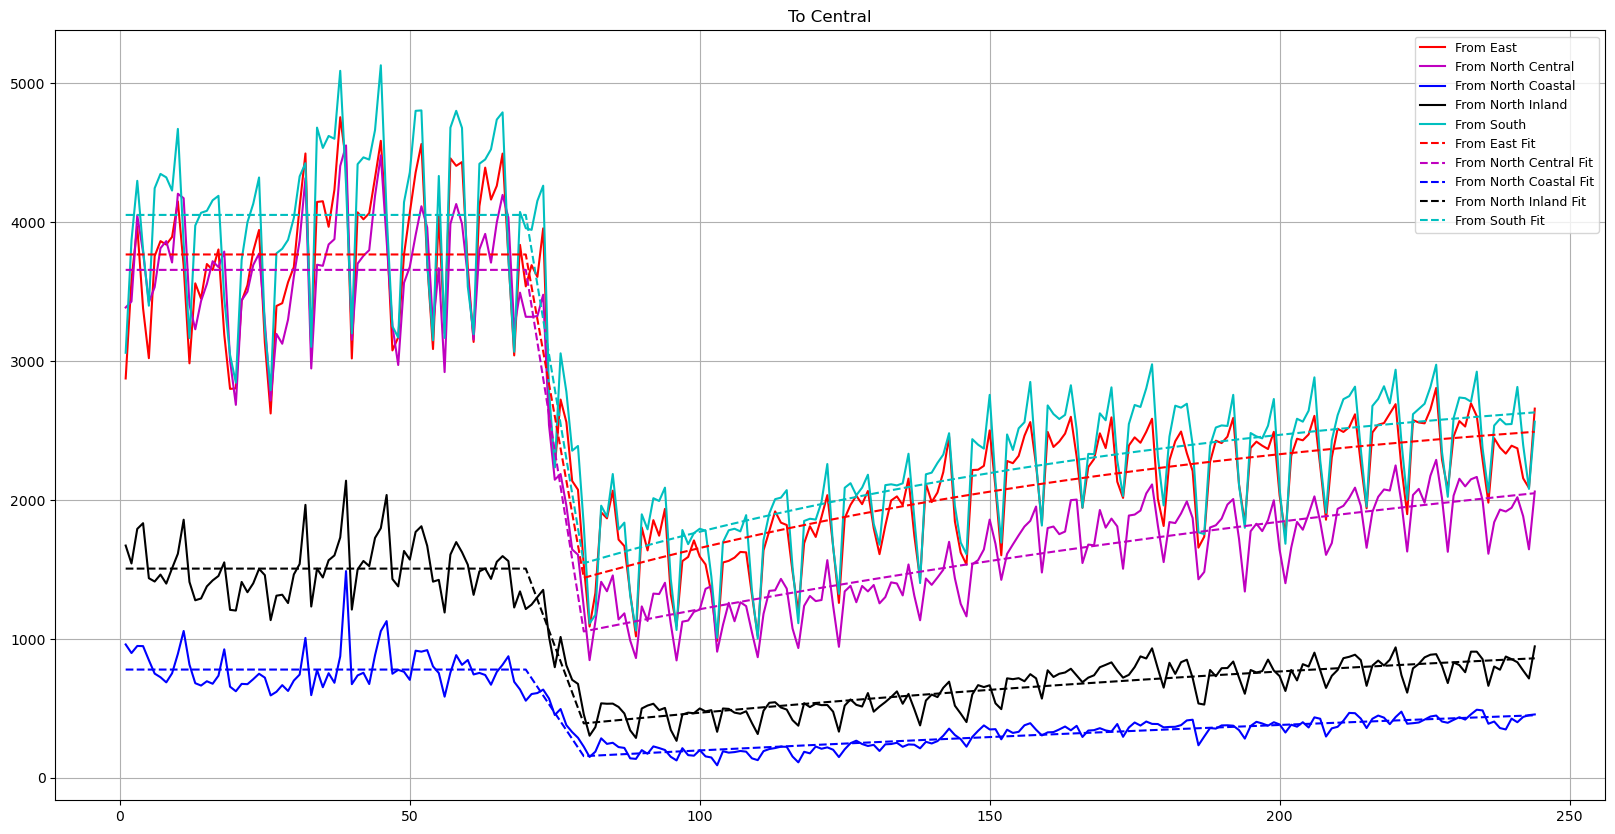

In [110]:
plt.figure(figsize=(20,10))
plt.title('To Central')
plt.plot(df['Date', 'Date'], df['East', 'Central'], label = 'From East', color = 'r')
plt.plot(df['Date', 'Date'], df['North Central', 'Central'], label = 'From North Central', color = 'm')
plt.plot(df['Date', 'Date'], df['North Coastal', 'Central'], label = 'From North Coastal', color = 'b')
plt.plot(df['Date', 'Date'], df['North Inland', 'Central'], label = 'From North Inland', color = 'k')
plt.plot(df['Date', 'Date'], df['South', 'Central'], label = 'From South', color = 'c')
plt.plot(xdata, piecewise(xdata, East_to_Central['Level 1'], East_to_Central['Level 2'], East_to_Central['Level 3'], East_to_Central['Recovery rate']), 'r--', label='From East Fit')
plt.plot(xdata, piecewise(xdata, NCentral_to_Central['Level 1'], NCentral_to_Central['Level 2'], NCentral_to_Central['Level 3'], NCentral_to_Central['Recovery rate']), 'm--', label='From North Central Fit')
plt.plot(xdata, piecewise(xdata, NCoastal_to_Central['Level 1'], NCoastal_to_Central['Level 2'], NCoastal_to_Central['Level 3'], NCoastal_to_Central['Recovery rate']), 'b--', label='From North Coastal Fit')
plt.plot(xdata, piecewise(xdata, NInland_to_Central['Level 1'], NInland_to_Central['Level 2'], NInland_to_Central['Level 3'], NInland_to_Central['Recovery rate']), 'k--', label='From North Inland Fit')
plt.plot(xdata, piecewise(xdata, South_to_Central['Level 1'], South_to_Central['Level 2'], South_to_Central['Level 3'], South_to_Central['Recovery rate']), 'c--', label='From South Fit')
plt.legend(loc='upper right', fontsize='9')
plt.grid()
plt.savefig('To Central.png')

In [29]:
# plt.figure(figsize=(20,10))
# plt.title('From Central')
# plt.plot(df['Date', 'Date'], df['Central', 'East'], label = 'To East', color = 'r')
# plt.plot(df['Date', 'Date'], df['Central', 'North Central'], label = 'To North Central', color = 'm')
# plt.plot(df['Date', 'Date'], df['Central', 'North Coastal'], label = 'To North Coastal', color = 'b')
# plt.plot(df['Date', 'Date'], df['Central', 'North Inland'], label = 'To North Inland', color = 'k')
# plt.plot(df['Date', 'Date'], df['Central', 'South'], label = 'To South', color = 'c')
# plt.plot(xdata, piecewise(xdata, Central_to_East['Level 1'], Central_to_East['Level 2'], Central_to_East['Level 3'], Central_to_East['Recovery rate']), 'r--', label='To East Fit')
# plt.plot(xdata, piecewise(xdata, Central_to_NCentral['Level 1'], Central_to_NCentral['Level 2'], Central_to_NCentral['Level 3'], Central_to_NCentral['Recovery rate']), 'm--', label='To North Central Fit')
# plt.plot(xdata, piecewise(xdata, Central_to_NCoastal['Level 1'], Central_to_NCoastal['Level 2'], Central_to_NCoastal['Level 3'], Central_to_NCoastal['Recovery rate']), 'b--', label='To North Coastal Fit')
# plt.plot(xdata, piecewise(xdata, Central_to_NInland['Level 1'], Central_to_NInland['Level 2'], Central_to_NInland['Level 3'], Central_to_NInland['Recovery rate']), 'k--', label='To North Inland Fit')
# plt.plot(xdata, piecewise(xdata, Central_to_South['Level 1'], Central_to_South['Level 2'], Central_to_South['Level 3'], Central_to_South['Recovery rate']), 'c--', label='To South Fit')
# plt.legend(loc='upper right', fontsize='9')
# plt.grid()
# plt.savefig('From Central.png')

In [30]:
# plt.figure(figsize=(20,10))
# plt.title('To East')
# plt.plot(df['Date', 'Date'], df['Central', 'East'], label = 'From Central', color = 'r')
# plt.plot(df['Date', 'Date'], df['North Central', 'East'], label = 'From North Central', color = 'm')
# plt.plot(df['Date', 'Date'], df['North Coastal', 'East'], label = 'From North Coastal', color = 'b')
# plt.plot(df['Date', 'Date'], df['North Inland', 'East'], label = 'From North Inland', color = 'k')
# plt.plot(df['Date', 'Date'], df['South', 'East'], label = 'From South', color = 'c')
# plt.plot(xdata, piecewise(xdata, Central_to_East['Level 1'], Central_to_East['Level 2'], Central_to_East['Level 3'], Central_to_East['Recovery rate']), 'r--', label='From Central Fit')
# plt.plot(xdata, piecewise(xdata, NCentral_to_East['Level 1'], NCentral_to_East['Level 2'], NCentral_to_East['Level 3'], NCentral_to_East['Recovery rate']), 'm--', label='From North Central Fit')
# plt.plot(xdata, piecewise(xdata, NCoastal_to_East['Level 1'], NCoastal_to_East['Level 2'], NCoastal_to_East['Level 3'], NCoastal_to_East['Recovery rate']), 'b--', label='From North Coastal Fit')
# plt.plot(xdata, piecewise(xdata, NInland_to_East['Level 1'], NInland_to_East['Level 2'], NInland_to_East['Level 3'], NInland_to_East['Recovery rate']), 'k--', label='From North Inland Fit')
# plt.plot(xdata, piecewise(xdata, South_to_East['Level 1'], South_to_East['Level 2'], South_to_East['Level 3'], South_to_East['Recovery rate']), 'c--', label='From South Fit')
# plt.legend(loc='upper right', fontsize='9')
# plt.grid()
# plt.savefig('To East.png')

In [31]:
# plt.figure(figsize=(20,10))
# plt.title('From East')
# plt.plot(df['Date', 'Date'], df['East', 'Central'], label = 'To Central', color = 'r')
# plt.plot(df['Date', 'Date'], df['East', 'North Central'], label = 'To North Central', color = 'm')
# plt.plot(df['Date', 'Date'], df['East', 'North Coastal'], label = 'To North Coastal', color = 'b')
# plt.plot(df['Date', 'Date'], df['East', 'North Inland'], label = 'To North Inland', color = 'k')
# plt.plot(df['Date', 'Date'], df['East', 'South'], label = 'To South', color = 'c')
# plt.plot(xdata, piecewise(xdata, East_to_Central['Level 1'], East_to_Central['Level 2'], East_to_Central['Level 3'], East_to_Central['Recovery rate']), 'r--', label='To Central Fit')
# plt.plot(xdata, piecewise(xdata, East_to_NCentral['Level 1'], East_to_NCentral['Level 2'], East_to_NCentral['Level 3'], East_to_NCentral['Recovery rate']), 'm--', label='To North Central Fit')
# plt.plot(xdata, piecewise(xdata, East_to_NCoastal['Level 1'], East_to_NCoastal['Level 2'], East_to_NCoastal['Level 3'], East_to_NCoastal['Recovery rate']), 'b--', label='To North Coastal Fit')
# plt.plot(xdata, piecewise(xdata, East_to_NInland['Level 1'], East_to_NInland['Level 2'], East_to_NInland['Level 3'], East_to_NInland['Recovery rate']), 'k--', label='To North Inland Fit')
# plt.plot(xdata, piecewise(xdata, East_to_South['Level 1'], East_to_South['Level 2'], East_to_South['Level 3'], East_to_South['Recovery rate']), 'c--', label='To South Fit')
# plt.legend(loc='upper right', fontsize='9')
# plt.grid()
# plt.savefig('From East.png')

In [32]:
# plt.figure(figsize=(20,10))
# plt.title('To North Central')
# plt.plot(df['Date', 'Date'], df['Central', 'North Central'], label = 'From Central', color = 'r')
# plt.plot(df['Date', 'Date'], df['East', 'North Central'], label = 'From East', color = 'm')
# plt.plot(df['Date', 'Date'], df['North Coastal', 'North Central'], label = 'From North Coastal', color = 'b')
# plt.plot(df['Date', 'Date'], df['North Inland', 'North Central'], label = 'From North Inland', color = 'k')
# plt.plot(df['Date', 'Date'], df['South', 'North Central'], label = 'From South', color = 'c')
# plt.plot(xdata, piecewise(xdata, Central_to_NCentral['Level 1'], Central_to_NCentral['Level 2'], Central_to_NCentral['Level 3'], Central_to_NCentral['Recovery rate']), 'r--', label='From Central Fit')
# plt.plot(xdata, piecewise(xdata, East_to_NCentral['Level 1'], East_to_NCentral['Level 2'], East_to_NCentral['Level 3'], East_to_NCentral['Recovery rate']), 'm--', label='From East Fit')
# plt.plot(xdata, piecewise(xdata, NCoastal_to_NCentral['Level 1'], NCoastal_to_NCentral['Level 2'], NCoastal_to_NCentral['Level 3'], NCoastal_to_NCentral['Recovery rate']), 'b--', label='From North Coastal Fit')
# plt.plot(xdata, piecewise(xdata, NInland_to_NCentral['Level 1'], NInland_to_NCentral['Level 2'], NInland_to_NCentral['Level 3'], NInland_to_NCentral['Recovery rate']), 'k--', label='From North Inland Fit')
# plt.plot(xdata, piecewise(xdata, South_to_NCentral['Level 1'], South_to_NCentral['Level 2'], South_to_NCentral['Level 3'], South_to_NCentral['Recovery rate']), 'c--', label='From South Fit')
# plt.legend(loc='upper right', fontsize='9')
# plt.grid()
# plt.savefig('To North Central.png')

In [33]:
# plt.figure(figsize=(20,10))
# plt.title('From North Central')
# plt.plot(df['Date', 'Date'], df['North Central', 'Central'], label = 'To Central', color = 'r')
# plt.plot(df['Date', 'Date'], df['North Central', 'East'], label = 'To East', color = 'm')
# plt.plot(df['Date', 'Date'], df['North Central', 'North Coastal'], label = 'To North Coastal', color = 'b')
# plt.plot(df['Date', 'Date'], df['North Central', 'North Inland'], label = 'To North Inland', color = 'k')
# plt.plot(df['Date', 'Date'], df['North Central', 'South'], label = 'To South', color = 'c')
# plt.plot(xdata, piecewise(xdata, NCentral_to_Central['Level 1'], NCentral_to_Central['Level 2'], NCentral_to_Central['Level 3'], NCentral_to_Central['Recovery rate']), 'r--', label='To Central Fit')
# plt.plot(xdata, piecewise(xdata, NCentral_to_East['Level 1'], NCentral_to_East['Level 2'], NCentral_to_East['Level 3'], NCentral_to_East['Recovery rate']), 'm--', label='To East Fit')
# plt.plot(xdata, piecewise(xdata, NCentral_to_NCoastal['Level 1'], NCentral_to_NCoastal['Level 2'], NCentral_to_NCoastal['Level 3'], NCentral_to_NCoastal['Recovery rate']), 'b--', label='To North Coastal Fit')
# plt.plot(xdata, piecewise(xdata, NCentral_to_NInland['Level 1'], NCentral_to_NInland['Level 2'], NCentral_to_NInland['Level 3'], NCentral_to_NInland['Recovery rate']), 'k--', label='To North Inland Fit')
# plt.plot(xdata, piecewise(xdata, NCentral_to_South['Level 1'], NCentral_to_South['Level 2'], NCentral_to_South['Level 3'], NCentral_to_South['Recovery rate']), 'c--', label='To South Fit')
# plt.legend(loc='upper right', fontsize='9')
# plt.grid()
# plt.savefig('From North Central.png')

In [34]:
# plt.figure(figsize=(20,10))
# plt.title('To North Coastal')
# plt.plot(df['Date', 'Date'], df['Central', 'North Coastal'], label = 'From Central', color = 'r')
# plt.plot(df['Date', 'Date'], df['East', 'North Coastal'], label = 'From East', color = 'm')
# plt.plot(df['Date', 'Date'], df['North Central', 'North Coastal'], label = 'From North Central', color = 'b')
# plt.plot(df['Date', 'Date'], df['North Inland', 'North Coastal'], label = 'From North Inland', color = 'k')
# plt.plot(df['Date', 'Date'], df['South', 'North Coastal'], label = 'From South', color = 'c')
# plt.plot(xdata, piecewise(xdata, Central_to_NCoastal['Level 1'], Central_to_NCoastal['Level 2'], Central_to_NCoastal['Level 3'], Central_to_NCoastal['Recovery rate']), 'r--', label='From Central Fit')
# plt.plot(xdata, piecewise(xdata, East_to_NCoastal['Level 1'], East_to_NCoastal['Level 2'], East_to_NCoastal['Level 3'], East_to_NCoastal['Recovery rate']), 'm--', label='From East Fit')
# plt.plot(xdata, piecewise(xdata, NCentral_to_NCoastal['Level 1'], NCentral_to_NCoastal['Level 2'], NCentral_to_NCoastal['Level 3'], NCentral_to_NCoastal['Recovery rate']), 'b--', label='From North Central Fit')
# plt.plot(xdata, piecewise(xdata, NInland_to_NCoastal['Level 1'], NInland_to_NCoastal['Level 2'], NInland_to_NCoastal['Level 3'], NInland_to_NCoastal['Recovery rate']), 'k--', label='From North Inland Fit')
# plt.plot(xdata, piecewise(xdata, South_to_NCoastal['Level 1'], South_to_NCoastal['Level 2'], South_to_NCoastal['Level 3'], South_to_NCoastal['Recovery rate']), 'c--', label='From South Fit')
# plt.legend(loc='upper right', fontsize='9')
# plt.grid()
# plt.savefig('To North Coastal.png')

In [35]:
# plt.figure(figsize=(20,10))
# plt.title('From North Coastal')
# plt.plot(df['Date', 'Date'], df['North Coastal', 'Central'], label = 'To Central', color = 'r')
# plt.plot(df['Date', 'Date'], df['North Coastal', 'East'], label = 'To East', color = 'm')
# plt.plot(df['Date', 'Date'], df['North Coastal', 'North Central'], label = 'To North Central', color = 'b')
# plt.plot(df['Date', 'Date'], df['North Coastal', 'North Inland'], label = 'To North Inland', color = 'k')
# plt.plot(df['Date', 'Date'], df['North Coastal', 'South'], label = 'To South', color = 'c')
# plt.plot(xdata, piecewise(xdata, NCoastal_to_Central['Level 1'], NCoastal_to_Central['Level 2'], NCoastal_to_Central['Level 3'], NCoastal_to_Central['Recovery rate']), 'r--', label='To Central Fit')
# plt.plot(xdata, piecewise(xdata, NCoastal_to_East['Level 1'], NCoastal_to_East['Level 2'], NCoastal_to_East['Level 3'], NCoastal_to_East['Recovery rate']), 'm--', label='To East Fit')
# plt.plot(xdata, piecewise(xdata, NCoastal_to_NCentral['Level 1'], NCoastal_to_NCentral['Level 2'], NCoastal_to_NCentral['Level 3'], NCoastal_to_NCentral['Recovery rate']), 'b--', label='To North Central Fit')
# plt.plot(xdata, piecewise(xdata, NCoastal_to_NInland['Level 1'], NCoastal_to_NInland['Level 2'], NCoastal_to_NInland['Level 3'], NCoastal_to_NInland['Recovery rate']), 'k--', label='To North Inland Fit')
# plt.plot(xdata, piecewise(xdata, NCoastal_to_South['Level 1'], NCoastal_to_South['Level 2'], NCoastal_to_South['Level 3'], NCoastal_to_South['Recovery rate']), 'c--', label='To South Fit')
# plt.legend(loc='upper right', fontsize='9')
# plt.grid()
# plt.savefig('From North Coastal.png')

In [36]:
# plt.figure(figsize=(20,10))
# plt.title('To North Inland')
# plt.plot(df['Date', 'Date'], df['Central', 'North Inland'], label = 'From Central', color = 'r')
# plt.plot(df['Date', 'Date'], df['East', 'North Inland'], label = 'From East', color = 'm')
# plt.plot(df['Date', 'Date'], df['North Central', 'North Inland'], label = 'From North Central', color = 'b')
# plt.plot(df['Date', 'Date'], df['North Coastal', 'North Inland'], label = 'From North Coastal', color = 'k')
# plt.plot(df['Date', 'Date'], df['South', 'North Inland'], label = 'From South', color = 'c')
# plt.plot(xdata, piecewise(xdata, Central_to_NInland['Level 1'], Central_to_NInland['Level 2'], Central_to_NInland['Level 3'], Central_to_NInland['Recovery rate']), 'r--', label='From Central Fit')
# plt.plot(xdata, piecewise(xdata, East_to_NInland['Level 1'], East_to_NInland['Level 2'], East_to_NInland['Level 3'], East_to_NInland['Recovery rate']), 'm--', label='From East Fit')
# plt.plot(xdata, piecewise(xdata, NCentral_to_NInland['Level 1'], NCentral_to_NInland['Level 2'], NCentral_to_NInland['Level 3'], NCentral_to_NInland['Recovery rate']), 'b--', label='From North Central Fit')
# plt.plot(xdata, piecewise(xdata, NCoastal_to_NInland['Level 1'], NCoastal_to_NInland['Level 2'], NCoastal_to_NInland['Level 3'], NCoastal_to_NInland['Recovery rate']), 'k--', label='From North Coastal Fit')
# plt.plot(xdata, piecewise(xdata, South_to_NInland['Level 1'], South_to_NInland['Level 2'], South_to_NInland['Level 3'], South_to_NInland['Recovery rate']), 'c--', label='From South Fit')
# plt.legend(loc='upper right', fontsize='9')
# plt.grid()
# plt.savefig('To North Inland.png')

In [37]:
# plt.figure(figsize=(20,10))
# plt.title('From North Inland')
# plt.plot(df['Date', 'Date'], df['North Inland', 'Central'], label = 'To Central', color = 'r')
# plt.plot(df['Date', 'Date'], df['North Inland', 'East'], label = 'To East', color = 'm')
# plt.plot(df['Date', 'Date'], df['North Inland', 'North Central'], label = 'To North Central', color = 'b')
# plt.plot(df['Date', 'Date'], df['North Inland', 'North Coastal'], label = 'To North Coastal', color = 'k')
# plt.plot(df['Date', 'Date'], df['North Inland', 'South'], label = 'To South', color = 'c')
# plt.plot(xdata, piecewise(xdata, NInland_to_Central['Level 1'], NInland_to_Central['Level 2'], NInland_to_Central['Level 3'], NInland_to_Central['Recovery rate']), 'r--', label='To Central Fit')
# plt.plot(xdata, piecewise(xdata, NInland_to_East['Level 1'], NInland_to_East['Level 2'], NInland_to_East['Level 3'], NInland_to_East['Recovery rate']), 'm--', label='To East Fit')
# plt.plot(xdata, piecewise(xdata, NInland_to_NCentral['Level 1'], NInland_to_NCentral['Level 2'], NInland_to_NCentral['Level 3'], NInland_to_NCentral['Recovery rate']), 'b--', label='To North Central Fit')
# plt.plot(xdata, piecewise(xdata, NInland_to_NCoastal['Level 1'], NInland_to_NCoastal['Level 2'], NInland_to_NCoastal['Level 3'], NInland_to_NCoastal['Recovery rate']), 'k--', label='To North Coastal Fit')
# plt.plot(xdata, piecewise(xdata, NInland_to_South['Level 1'], NInland_to_South['Level 2'], NInland_to_South['Level 3'], NInland_to_South['Recovery rate']), 'c--', label='To South Fit')
# plt.legend(loc='upper right', fontsize='9')
# plt.grid()
# plt.savefig('From North Inland.png')

In [38]:
# plt.figure(figsize=(20,10))
# plt.title('To South')
# plt.plot(df['Date', 'Date'], df['Central', 'South'], label = 'From Central', color = 'r')
# plt.plot(df['Date', 'Date'], df['East', 'South'], label = 'From East', color = 'm')
# plt.plot(df['Date', 'Date'], df['North Central', 'South'], label = 'From North Central', color = 'b')
# plt.plot(df['Date', 'Date'], df['North Coastal', 'South'], label = 'From North Coastal', color = 'k')
# plt.plot(df['Date', 'Date'], df['North Inland', 'South'], label = 'From North Inland', color = 'c')
# plt.plot(xdata, piecewise(xdata, Central_to_South['Level 1'], Central_to_South['Level 2'], Central_to_South['Level 3'], Central_to_South['Recovery rate']), 'r--', label='From Central Fit')
# plt.plot(xdata, piecewise(xdata, East_to_South['Level 1'], East_to_South['Level 2'], East_to_South['Level 3'], East_to_South['Recovery rate']), 'm--', label='From East Fit')
# plt.plot(xdata, piecewise(xdata, NCentral_to_South['Level 1'], NCentral_to_South['Level 2'], NCentral_to_South['Level 3'], NCentral_to_South['Recovery rate']), 'b--', label='From North Central Fit')
# plt.plot(xdata, piecewise(xdata, NCoastal_to_South['Level 1'], NCoastal_to_South['Level 2'], NCoastal_to_South['Level 3'], NCoastal_to_South['Recovery rate']), 'k--', label='From North Coastal Fit')
# plt.plot(xdata, piecewise(xdata, NInland_to_South['Level 1'], NInland_to_South['Level 2'], NInland_to_South['Level 3'], NInland_to_South['Recovery rate']), 'c--', label='From North Inland Fit')
# plt.legend(loc='upper right', fontsize='9')
# plt.grid()
# plt.savefig('To South.png')

In [39]:
# plt.figure(figsize=(20,10))
# plt.title('From South')
# plt.plot(df['Date', 'Date'], df['South', 'Central'], label = 'To Central', color = 'r')
# plt.plot(df['Date', 'Date'], df['South', 'East'], label = 'To East', color = 'm')
# plt.plot(df['Date', 'Date'], df['South', 'North Central'], label = 'To North Central', color = 'b')
# plt.plot(df['Date', 'Date'], df['South', 'North Coastal'], label = 'To North Coastal', color = 'k')
# plt.plot(df['Date', 'Date'], df['South', 'North Inland'], label = 'To North Inland', color = 'c')
# plt.plot(xdata, piecewise(xdata, South_to_Central['Level 1'], South_to_Central['Level 2'], South_to_Central['Level 3'], South_to_Central['Recovery rate']), 'r--', label='To Central Fit')
# plt.plot(xdata, piecewise(xdata, South_to_East['Level 1'], South_to_East['Level 2'], South_to_East['Level 3'], South_to_East['Recovery rate']), 'm--', label='To East Fit')
# plt.plot(xdata, piecewise(xdata, South_to_NCentral['Level 1'], South_to_NCentral['Level 2'], South_to_NCentral['Level 3'], South_to_NCentral['Recovery rate']), 'b--', label='To North Central Fit')
# plt.plot(xdata, piecewise(xdata, South_to_NCoastal['Level 1'], South_to_NCoastal['Level 2'], South_to_NCoastal['Level 3'], South_to_NCoastal['Recovery rate']), 'k--', label='To North Coastal Fit')
# plt.plot(xdata, piecewise(xdata, South_to_NInland['Level 1'], South_to_NInland['Level 2'], South_to_NInland['Level 3'], South_to_NInland['Recovery rate']), 'c--', label='To North Inland Fit')
# plt.legend(loc='upper right', fontsize='9')
# plt.grid()
# plt.savefig('From South.png')